In [1]:
 import sys
 sys.path.insert(0, '..')

In [2]:

import requests
#from utils.args import run_args, args
import pandas as pd
import numpy as np
from utils.DataGeneration import DataGeneration
from Indicators.MA import *
from Indicators.ATR import *
from Indicators.TPO import *
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [4]:
start_date = '2023-01-01T00:00:00Z'
end_date = '2024-01-01T00:00:00Z'
eur_usd = DataGeneration(instument_name='EUR_USD', time_frame='M5', start_time=start_date, end_time=end_date)
df = eur_usd.get_instruments_df()
print(df)


Requesting data from 2023-01-01T00:00:00Z to 2023-01-18T08:40:00Z
Params: {'granularity': 'M5', 'price': 'MBA', 'from': '2023-01-01T00:00:00Z', 'to': '2023-01-18T08:40:00Z'}
Response status: 200
Requesting data from 2023-01-18T08:40:00Z to 2023-02-04T17:20:00Z
Params: {'granularity': 'M5', 'price': 'MBA', 'from': '2023-01-18T08:40:00Z', 'to': '2023-02-04T17:20:00Z'}
Response status: 200
Requesting data from 2023-02-04T17:20:00Z to 2023-02-22T02:00:00Z
Params: {'granularity': 'M5', 'price': 'MBA', 'from': '2023-02-04T17:20:00Z', 'to': '2023-02-22T02:00:00Z'}
Response status: 200
Requesting data from 2023-02-22T02:00:00Z to 2023-03-11T10:40:00Z
Params: {'granularity': 'M5', 'price': 'MBA', 'from': '2023-02-22T02:00:00Z', 'to': '2023-03-11T10:40:00Z'}
Response status: 200
Requesting data from 2023-03-11T10:40:00Z to 2023-03-28T19:20:00Z
Params: {'granularity': 'M5', 'price': 'MBA', 'from': '2023-03-11T10:40:00Z', 'to': '2023-03-28T19:20:00Z'}
Response status: 200
Requesting data from 2023

In [18]:
df

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
0,2020-01-01T22:00:00.000000000Z,1,1.12124,1.12124,1.12124,1.12124,1.12083,1.12083,1.12083,1.12083,1.12165,1.12165,1.12165,1.12165
1,2020-01-01T22:01:00.000000000Z,1,1.12138,1.12138,1.12138,1.12138,1.12094,1.12094,1.12094,1.12094,1.12182,1.12182,1.12182,1.12182
2,2020-01-01T22:02:00.000000000Z,4,1.12138,1.12146,1.12138,1.12146,1.12094,1.12106,1.12093,1.12106,1.12182,1.12186,1.12182,1.12186
3,2020-01-01T22:03:00.000000000Z,3,1.12142,1.12142,1.12132,1.12132,1.12101,1.12101,1.12083,1.12083,1.12182,1.12182,1.12182,1.12182
4,2020-01-01T22:05:00.000000000Z,2,1.12137,1.12137,1.12133,1.12133,1.12087,1.12087,1.12083,1.12083,1.12187,1.12187,1.12183,1.12183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127368,2020-05-08T20:55:00.000000000Z,16,1.08390,1.08397,1.08390,1.08396,1.08375,1.08384,1.08375,1.08380,1.08404,1.08413,1.08403,1.08413
127369,2020-05-08T20:56:00.000000000Z,16,1.08398,1.08416,1.08398,1.08408,1.08384,1.08394,1.08377,1.08378,1.08413,1.08446,1.08411,1.08438
127370,2020-05-08T20:57:00.000000000Z,4,1.08404,1.08404,1.08400,1.08400,1.08367,1.08375,1.08358,1.08360,1.08441,1.08441,1.08433,1.08439
127371,2020-05-08T20:58:00.000000000Z,11,1.08395,1.08399,1.08376,1.08380,1.08357,1.08358,1.08326,1.08330,1.08433,1.08443,1.08426,1.08430


In [21]:
nan_indices = df[df['ask_o'].isna()].index
nan_indices

Index([], dtype='int64')

In [25]:
df['time'] = pd.to_datetime(df['time'])  # Ensure 'time' is in datetime format
df.set_index('time', inplace=True)  # Set 'time' as the index for easier plotting

In [27]:
df

,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
time,,,,,,,,,,,,,
2020-01-01 22:00:00+00:00,1,1.12124,1.12124,1.12124,1.12124,1.12083,1.12083,1.12083,1.12083,1.12165,1.12165,1.12165,1.12165
2020-01-01 22:01:00+00:00,1,1.12138,1.12138,1.12138,1.12138,1.12094,1.12094,1.12094,1.12094,1.12182,1.12182,1.12182,1.12182
2020-01-01 22:02:00+00:00,4,1.12138,1.12146,1.12138,1.12146,1.12094,1.12106,1.12093,1.12106,1.12182,1.12186,1.12182,1.12186
2020-01-01 22:03:00+00:00,3,1.12142,1.12142,1.12132,1.12132,1.12101,1.12101,1.12083,1.12083,1.12182,1.12182,1.12182,1.12182
2020-01-01 22:05:00+00:00,2,1.12137,1.12137,1.12133,1.12133,1.12087,1.12087,1.12083,1.12083,1.12187,1.12187,1.12183,1.12183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-08 20:55:00+00:00,16,1.08390,1.08397,1.08390,1.08396,1.08375,1.08384,1.08375,1.08380,1.08404,1.08413,1.08403,1.08413
2020-05-08 20:56:00+00:00,16,1.08398,1.08416,1.08398,1.08408,1.08384,1.08394,1.08377,1.08378,1.08413,1.08446,1.08411,1.08438
2020-05-08 20:57:00+00:00,4,1.08404,1.08404,1.08400,1.08400,1.08367,1.08375,1.08358,1.08360,1.08441,1.08441,1.08433,1.08439


In [30]:
start_time = '2020-01-01 22:05:00+00:00'
end_time = '2020-01-01 22:25:00+00:00'

# Select data between the given timestamps
filtered_data = df.loc[start_time:end_time]

# Display the filtered data
print(filtered_data)

                           volume    mid_o    mid_h    mid_l    mid_c  \
time                                                                    
2020-01-01 22:05:00+00:00       2  1.12137  1.12137  1.12133  1.12133   
2020-01-01 22:06:00+00:00       1  1.12126  1.12126  1.12126  1.12126   
2020-01-01 22:07:00+00:00       1  1.12130  1.12130  1.12130  1.12130   
2020-01-01 22:08:00+00:00       1  1.12125  1.12125  1.12125  1.12125   
2020-01-01 22:11:00+00:00       1  1.12129  1.12129  1.12129  1.12129   
2020-01-01 22:14:00+00:00       1  1.12125  1.12125  1.12125  1.12125   
2020-01-01 22:15:00+00:00       5  1.12135  1.12149  1.12134  1.12134   
2020-01-01 22:16:00+00:00       1  1.12138  1.12138  1.12138  1.12138   
2020-01-01 22:17:00+00:00       4  1.12134  1.12155  1.12134  1.12155   
2020-01-01 22:19:00+00:00       2  1.12150  1.12150  1.12146  1.12146   
2020-01-01 22:21:00+00:00       4  1.12143  1.12154  1.12143  1.12154   

                             bid_o    bid_h    bid

In [ ]:
# Calculate the time difference between consecutive rows
time_diff = df.index.to_series().diff()

# Define the expected time interval (e.g., 1 minute, 5 minutes, etc.)
expected_interval = pd.Timedelta('1min')  # Replace '1min' with the actual interval of your data

# Find where the time difference exceeds the expected interval
gaps = time_diff[time_diff > expected_interval]

if not gaps.empty:
    print("Gaps detected in the data:")
    print(gaps)
else:
    print("No gaps detected in the data.")


Gaps detected in the data:
time
2020-01-01 22:05:00+00:00   0 days 00:02:00
2020-01-01 22:11:00+00:00   0 days 00:03:00
2020-01-01 22:14:00+00:00   0 days 00:03:00
2020-01-01 22:19:00+00:00   0 days 00:02:00
2020-01-01 22:21:00+00:00   0 days 00:02:00
                                  ...      
2020-05-07 21:51:00+00:00   0 days 00:03:00
2020-05-07 22:13:00+00:00   0 days 00:02:00
2020-05-08 00:32:00+00:00   0 days 00:02:00
2020-05-08 04:11:00+00:00   0 days 00:02:00
2020-05-08 05:05:00+00:00   0 days 00:02:00
Name: time, Length: 3091, dtype: timedelta64[ns]


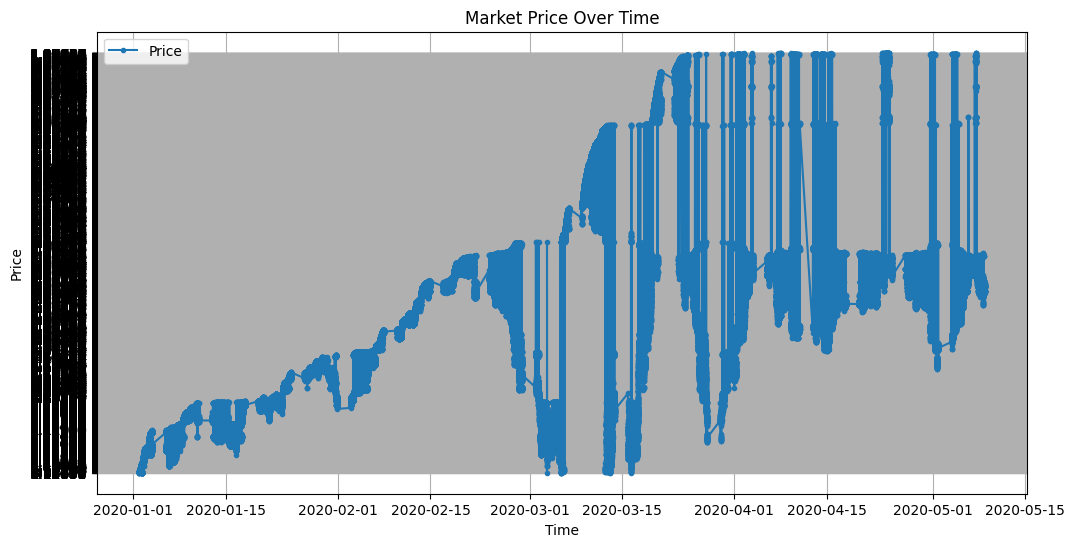

In [26]:
import pandas as pd
import matplotlib.pyplot as plt



# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, np.array(df['bid_o']), label='Price', linestyle='-', marker='.')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Market Price Over Time')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has a 'Timestamp' column
# Replace 'Timestamp' and 'Value' with the actual column names in your DataFrame
df['Time'] = pd.to_datetime(df['time'])  # Ensure 'Timestamp' is in datetime format
df.set_index('Time', inplace=True)  # Set 'Timestamp' as the index

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['bid_o'], marker='o', linestyle='-', label='Recorded Data')  # Replace 'Value' with your actual column
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Data Recording with Time')
plt.grid(True)
plt.legend()

# Highlight gaps
time_diff = df.index.to_series().diff()
gap_threshold = pd.Timedelta(seconds=30)  # Define a threshold for gaps (e.g., 30 seconds)
gaps = time_diff > gap_threshold
if gaps.any():
    for gap_time in df.index[gaps]:
        plt.axvline(gap_time, color='red', linestyle='--', label='Gap')

plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x355311580> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x110ae1e10>>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Finance/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Error in callback <function flush_figures at 0x32c783920> (for post_execute), with arguments args (),kwargs {}:


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x110ae1e10>>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Finance/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x110ae1e10>>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Finance/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 

KeyboardInterrupt



In [6]:
ob1=MA()
x = ob1.calculate_MA(20, df)
x = ob1.calculate_MA(50, x)
x

KeyboardInterrupt: 

In [7]:
ob2 = ATR()
x = ob2.calculate_ATR(15,df)
x


,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,ma20,ATR15
0,2023-01-01T23:05:00.000000000Z,4,1.06999,1.07003,1.06962,1.07003,1.06949,1.06953,1.06912,1.06953,1.07049,1.07053,1.07012,1.07053,1.070530,0.000410
1,2023-01-01T23:10:00.000000000Z,5,1.06988,1.06998,1.06979,1.06998,1.06938,1.06948,1.06929,1.06948,1.07038,1.07048,1.07029,1.07048,1.070505,0.000325
2,2023-01-01T23:15:00.000000000Z,3,1.06972,1.07005,1.06972,1.07005,1.06922,1.06955,1.06922,1.06955,1.07022,1.07055,1.07022,1.07055,1.070520,0.000327
3,2023-01-01T23:20:00.000000000Z,1,1.07000,1.07000,1.07000,1.07000,1.06950,1.06950,1.06950,1.06950,1.07050,1.07050,1.07050,1.07050,1.070515,0.000257
4,2023-01-01T23:30:00.000000000Z,4,1.07000,1.07008,1.07000,1.07008,1.06950,1.06983,1.06950,1.06983,1.07050,1.07050,1.07025,1.07033,1.070478,0.000256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74532,2023-12-29T21:35:00.000000000Z,73,1.10364,1.10382,1.10364,1.10379,1.10355,1.10374,1.10355,1.10371,1.10374,1.10391,1.10374,1.10387,0.000000,0.000213
74533,2023-12-29T21:40:00.000000000Z,87,1.10379,1.10388,1.10364,1.10379,1.10370,1.10379,1.10356,1.10371,1.10388,1.10396,1.10372,1.10387,0.000000,0.000222
74534,2023-12-29T21:45:00.000000000Z,58,1.10380,1.10391,1.10379,1.10385,1.10371,1.10384,1.10371,1.10378,1.10388,1.10398,1.10387,1.10392,0.000000,0.000217
74535,2023-12-29T21:50:00.000000000Z,175,1.10386,1.10397,1.10382,1.10392,1.10379,1.10389,1.10375,1.10383,1.10393,1.10407,1.10389,1.10401,0.000000,0.000215


In [ ]:
df

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,ma20,ma50,ATR15
0,2022-11-01T00:00:00.000000000Z,688,0.98860,0.98902,0.98827,0.98877,0.98851,0.98892,0.98819,0.98868,0.98869,0.98911,0.98835,0.98886,0.988860,0.988860,0.000760
1,2022-11-01T00:15:00.000000000Z,711,0.98880,0.98898,0.98862,0.98879,0.98872,0.98890,0.98854,0.98869,0.98889,0.98906,0.98870,0.98889,0.988875,0.988875,0.000560
2,2022-11-01T00:30:00.000000000Z,664,0.98880,0.98898,0.98842,0.98844,0.98870,0.98891,0.98835,0.98837,0.98889,0.98907,0.98849,0.98852,0.988757,0.988757,0.000567
3,2022-11-01T00:45:00.000000000Z,881,0.98845,0.98867,0.98824,0.98853,0.98837,0.98858,0.98817,0.98846,0.98853,0.98877,0.98832,0.98860,0.988718,0.988718,0.000538
4,2022-11-01T01:00:00.000000000Z,908,0.98852,0.98925,0.98852,0.98920,0.98844,0.98917,0.98843,0.98912,0.98859,0.98934,0.98859,0.98928,0.988830,0.988830,0.000580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25617,2023-11-09T22:45:00.000000000Z,432,1.06698,1.06708,1.06688,1.06696,1.06691,1.06698,1.06676,1.06680,1.06705,1.06718,1.06697,1.06713,1.067505,1.069142,0.000529
25618,2023-11-09T23:00:00.000000000Z,238,1.06704,1.06704,1.06664,1.06679,1.06696,1.06696,1.06653,1.06669,1.06712,1.06712,1.06672,1.06689,1.067381,1.069097,0.000489
25619,2023-11-09T23:15:00.000000000Z,349,1.06680,1.06681,1.06643,1.06648,1.06671,1.06672,1.06635,1.06640,1.06688,1.06690,1.06651,1.06655,1.067212,1.069053,0.000415
25620,2023-11-09T23:30:00.000000000Z,210,1.06648,1.06661,1.06645,1.06654,1.06640,1.06653,1.06637,1.06646,1.06655,1.06669,1.06653,1.06663,1.067057,1.069004,0.000374


In [119]:
import pandas as pd


class PriceMACrossover:
    def __init__(self, df, initial_capital, risk_type='constant'):
        self.df = df.copy()
        self.risk_type = risk_type
        self.atr_column = [col for col in df.columns if col.startswith("ATR")][0]

        # Convert relevant columns to numeric
        self.df['bid_c'] = pd.to_numeric(self.df['bid_c'], errors='coerce')
        self.df['bid_o'] = pd.to_numeric(self.df['bid_o'], errors='coerce')
        self.df[f'{self.atr_column}'] = pd.to_numeric(self.df[f'{self.atr_column}'], errors='coerce')

        # Drop rows with NaN values in key columns
        self.df.dropna(subset=['bid_c', 'bid_o', f'{self.atr_column}'], inplace=True)

        self.initial_capital = initial_capital
        self.current_capital = initial_capital
        self.risk_percentage = 0.01
        self.risk_steps = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.0]
        self.current_risk_step = 0
        self.trade_log = []
        self.total_pure_profit = 0
        self.current_step_profit = 0
        self.position_groups = {}  # To track grouped positions

    def calculate_signals(self, MA):
        self.df[f'MA{MA}'] = self.df['bid_c'].rolling(window=MA).mean()
        self.df['bid_c_prev'] = self.df['bid_c'].shift(1)
        self.df[f'MA{MA}_prev'] = self.df[f'MA{MA}'].shift(1)
        self.df['Signal'] = 0
        self.df.loc[(self.df['bid_c_prev'] <= self.df[f'MA{MA}_prev']) & (self.df['bid_c'] > self.df[f'MA{MA}']), 'Signal'] = 1
        self.df.loc[(self.df['bid_c_prev'] >= self.df[f'MA{MA}_prev']) & (self.df['bid_c'] < self.df[f'MA{MA}']), 'Signal'] = -1
        self.df['Signal'] = self.df['Signal'].shift(-1)

    def constant_risk(self, risk_percentage=0.01):
        self.risk_percentage = risk_percentage

    def alteringrisk(self):
        current_step_profit_per = (self.current_step_profit / self.initial_capital)
        if current_step_profit_per >= 0.1:
            self.current_step_profit = 0
            self.current_risk_step = min(self.current_risk_step + 1, len(self.risk_steps) - 1)
        elif current_step_profit_per <= -0.05:
            self.current_step_profit = 0
            self.current_risk_step = max(self.current_risk_step - 1, 0)
        self.risk_percentage = self.risk_steps[self.current_risk_step]

    def handle_position(self):
        for i in range(len(self.df) - 1):
            signal = self.df.loc[i, 'Signal']
            atr = self.df.loc[i, f'{self.atr_column}']
            next_open_price = self.df.loc[i + 1, 'bid_o']

            if signal == 1:
                self.open_grouped_positions(i + 1, "long", next_open_price, atr)
            elif signal == -1:
                self.open_grouped_positions(i + 1, "short", next_open_price, atr)

    def open_grouped_positions(self, i, position_type, entry_price, atr):
        group_id = len(self.position_groups) + 1
        stop_loss = entry_price - 2 * atr if position_type == "long" else entry_price + 2 * atr
        take_profits = [
            entry_price + factor * atr if position_type == "long" else entry_price - factor * atr
            for factor in [2, 4, 6, 8, 10, 12]
        ]

        self.position_groups[group_id] = {
            "positions": [
                {"TP": tp, "SL": stop_loss, "active": True, "entry_price": entry_price}
                for tp in take_profits
            ],
            "risk_free": False,  # Flag to indicate risk-free adjustment
        }
        subgroup_id = 1
        for position in self.position_groups[group_id]["positions"]:
            self.execute_trade(i, position_type, entry_price, position["SL"], position["TP"], group_id, subgroup_id)
            subgroup_id += 1

    def execute_trade(self, i, position_type, entry_price, stop_loss, take_profit, group_id, subgroup_id):
        if self.risk_type == 'altering_8_step':
            self.alteringrisk()

        risk_per_trade = self.risk_percentage * self.current_capital
        risk_per_trade_volume = risk_per_trade / entry_price  # Calculate volume

        group = self.position_groups[group_id]
        print('position_type',position_type)
        if group["risk_free"] == True:
            stop_loss = group["positions"][subgroup_id - 1]["entry_price"]  # Use the updated SL dynamically
            print('group["positions"][subgroup_id - 1]["entry_price"]',group["positions"][subgroup_id - 1]["entry_price"])
            if subgroup_id>3:
                if group["positions"][0]["active"]==True:
                    stop_loss = group["positions"][0]["TP"]  # Use the updated SL dynamically
                elif group["positions"][1]["active"]==True:
                    stop_loss = group["positions"][1]["TP"]  # Use the updated SL dynamically
                elif group["positions"][2]["active"]==True:
                    stop_loss = group["positions"][2]["TP"]  # Use the updated SL dynamically
                # elif group["positions"][3]["active"]==True:
                #     stop_loss = group["positions"][3]["TP"]  # Use the updated SL dynamically
                # elif group["positions"][4]["active"]==True:
                #     stop_loss = group["positions"][4]["TP"]  # Use the updated SL dynamically
                # elif group["positions"][5]["active"]==True:
                #     stop_loss = group["positions"][5]["TP"]  # Use the updated SL dynamically


        else:
            stop_loss = group["positions"][subgroup_id - 1]["SL"]  # Use the updated SL dynamically


        for j in range(i + 1, len(self.df)):
            current_price = self.df.loc[j, 'bid_c']
            time_start = self.df.loc[i, 'time']
            time_end = self.df.loc[j, 'time']

            # Fetch the latest SL dynamically from the group
            

            # Check for Take Profit
            if position_type == "long" and current_price >= take_profit:
                pip_amount = current_price - entry_price
                profit_loss = pip_amount * risk_per_trade_volume
                self.update_trade_log(time_start, time_end, entry_price, current_price, pip_amount, profit_loss)
                self.update_group(group_id, subgroup_id)  # Update SLs for remaining positions
                break

            if position_type == "short" and current_price <= take_profit:
                pip_amount = entry_price - current_price
                profit_loss = pip_amount * risk_per_trade_volume
                self.update_trade_log(time_start, time_end, entry_price, current_price, pip_amount, profit_loss)
                self.update_group(group_id, subgroup_id)  # Update SLs for remaining positions
                break

            # Check for Stop Loss
            if position_type == "long" and current_price <= stop_loss:
                pip_amount = current_price - entry_price
                profit_loss = pip_amount * risk_per_trade_volume
                self.update_trade_log(time_start, time_end, entry_price, current_price, pip_amount, profit_loss)
                break

            if position_type == "short" and current_price >= stop_loss:
                pip_amount = entry_price - current_price
                profit_loss = pip_amount * risk_per_trade_volume
                self.update_trade_log(time_start, time_end, entry_price, current_price, pip_amount, profit_loss)
                break

    def update_group(self, group_id, subgroup_id):
        """
        Update the group after a position in a subgroup hits its Take Profit (TP).
        For the first subgroup's TP, make the remaining subgroups risk-free by updating their SL.

        Args:
            group_id (int): Group ID of the positions.
            subgroup_id (int): Subgroup ID of the position that hit its TP.
        """
        group = self.position_groups[group_id]

        # Mark the subgroup as inactive if its TP is hit
        group["positions"][subgroup_id - 1]["active"] = False

        # If the first subgroup's TP is hit, adjust SL for the remaining positions
        if subgroup_id == 1 and not group["risk_free"]:
            for position in group["positions"][1:]:  # Remaining positions in the group
                if position["active"]:  # Only update active positions
                    position["SL"] = position["entry_price"]  # Set SL to entry price
            group["risk_free"] = True

        # Reflect updated SLs in the trading process

        self.position_groups[group_id] = group

    def update_trade_log(self, start_time, end_time, entry_price, exit_price, pip_amount, profit_loss):
        self.current_capital += profit_loss
        self.trade_log.append({
            "Start Time": start_time,
            "End Time": end_time,
            "Entry Price": entry_price,
            "Exit Price": exit_price,
            "Pip Amount": pip_amount,
            "Profit/Loss": profit_loss,
            "Total Capital": self.current_capital,
            "Risk Percentage": self.risk_percentage,
        })

    def run_strategy(self, MA, constant_risk=0.01, start_time=None, end_time=None):
        if self.risk_type == 'constant':
            self.constant_risk(constant_risk)
        if start_time and end_time:
            self.df = self.df[(self.df['time'] >= start_time) & (self.df['time'] <= end_time)]
        self.calculate_signals(MA)
        self.handle_position()
        return pd.DataFrame(self.trade_log)


In [120]:
strategy = PriceMACrossover(x, initial_capital=10000,risk_type='constant')
trade_log_df = strategy.run_strategy(MA=50, constant_risk=0.02)

position_type long
position_type long
position_type long
position_type long
position_type long
position_type long
position_type short
position_type short
group["positions"][subgroup_id - 1]["entry_price"] 1.06896
position_type short
group["positions"][subgroup_id - 1]["entry_price"] 1.06896
position_type short
group["positions"][subgroup_id - 1]["entry_price"] 1.06896
position_type short
group["positions"][subgroup_id - 1]["entry_price"] 1.06896
position_type short
group["positions"][subgroup_id - 1]["entry_price"] 1.06896
position_type long
position_type long
position_type long
position_type long
position_type long
position_type long
position_type short
position_type short
group["positions"][subgroup_id - 1]["entry_price"] 1.06855
position_type short
group["positions"][subgroup_id - 1]["entry_price"] 1.06855
position_type short
group["positions"][subgroup_id - 1]["entry_price"] 1.06855
position_type short
group["positions"][subgroup_id - 1]["entry_price"] 1.06855
position_type short
g

In [121]:
trade_log_df

,Start Time,End Time,Entry Price,Exit Price,Pip Amount,Profit/Loss,Total Capital,Risk Percentage
0,2023-01-02T09:00:00.000000000Z,2023-01-02T15:55:00.000000000Z,1.06783,1.06596,-0.00187,-0.350243,9999.649757,0.02
1,2023-01-02T09:00:00.000000000Z,2023-01-02T15:55:00.000000000Z,1.06783,1.06596,-0.00187,-0.350231,9999.299526,0.02
2,2023-01-02T09:00:00.000000000Z,2023-01-02T15:55:00.000000000Z,1.06783,1.06596,-0.00187,-0.350218,9998.949308,0.02
3,2023-01-02T09:00:00.000000000Z,2023-01-02T15:55:00.000000000Z,1.06783,1.06596,-0.00187,-0.350206,9998.599102,0.02
4,2023-01-02T09:00:00.000000000Z,2023-01-02T15:55:00.000000000Z,1.06783,1.06596,-0.00187,-0.350194,9998.248908,0.02
...,...,...,...,...,...,...,...,...
35284,2023-12-29T17:35:00.000000000Z,2023-12-29T18:20:00.000000000Z,1.10582,1.10497,-0.00085,-0.177546,11548.875502,0.02
35285,2023-12-29T17:35:00.000000000Z,2023-12-29T18:20:00.000000000Z,1.10582,1.10497,-0.00085,-0.177543,11548.697958,0.02
35286,2023-12-29T18:00:00.000000000Z,2023-12-29T18:05:00.000000000Z,1.10634,1.10511,0.00123,0.256791,11548.954749,0.02
35287,2023-12-29T18:00:00.000000000Z,2023-12-29T19:05:00.000000000Z,1.10634,1.10460,0.00174,0.363273,11549.318022,0.02


In [ ]:
ob3 = TPO()
tpo_df = ob3.calculate_TPO(x,30,0.001)
tpo_df


,Time,Price,TPO
0,2022-11-02T06:00:00.000000000Z,0.98837,11
1,2022-11-02T06:00:00.000000000Z,0.98937,8
2,2022-11-02T06:00:00.000000000Z,0.99337,8
3,2022-11-02T06:00:00.000000000Z,0.98737,6
4,2022-11-02T06:00:00.000000000Z,0.99237,6
...,...,...,...
31875,2023-11-09T23:00:00.000000000Z,1.07110,16
31876,2023-11-09T23:00:00.000000000Z,1.06910,6
31877,2023-11-09T23:00:00.000000000Z,1.07010,6
31878,2023-11-09T23:00:00.000000000Z,1.06710,3


In [ ]:
x = x[['time', 'ask_o', 'ask_h', 'ask_l', 'ask_c', 'volume']].copy()
x.rename(columns={
    'ask_o': 'Open',
    'ask_h': 'High',
    'ask_l': 'Low',
    'ask_c': 'Close',
    'volume': 'Volume'
}, inplace=True)

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
x[numeric_cols] = x[numeric_cols].apply(pd.to_numeric, errors='coerce')




In [ ]:
x['time'] = pd.to_datetime(x['time'])


                              Time    Price  TPO
15  2022-11-02T09:00:00.000000000Z  0.98837   13
16  2022-11-02T09:00:00.000000000Z  0.99337    8
17  2022-11-02T09:00:00.000000000Z  0.98737    7
18  2022-11-02T09:00:00.000000000Z  0.98937    7
19  2022-11-02T09:00:00.000000000Z  0.99237    6


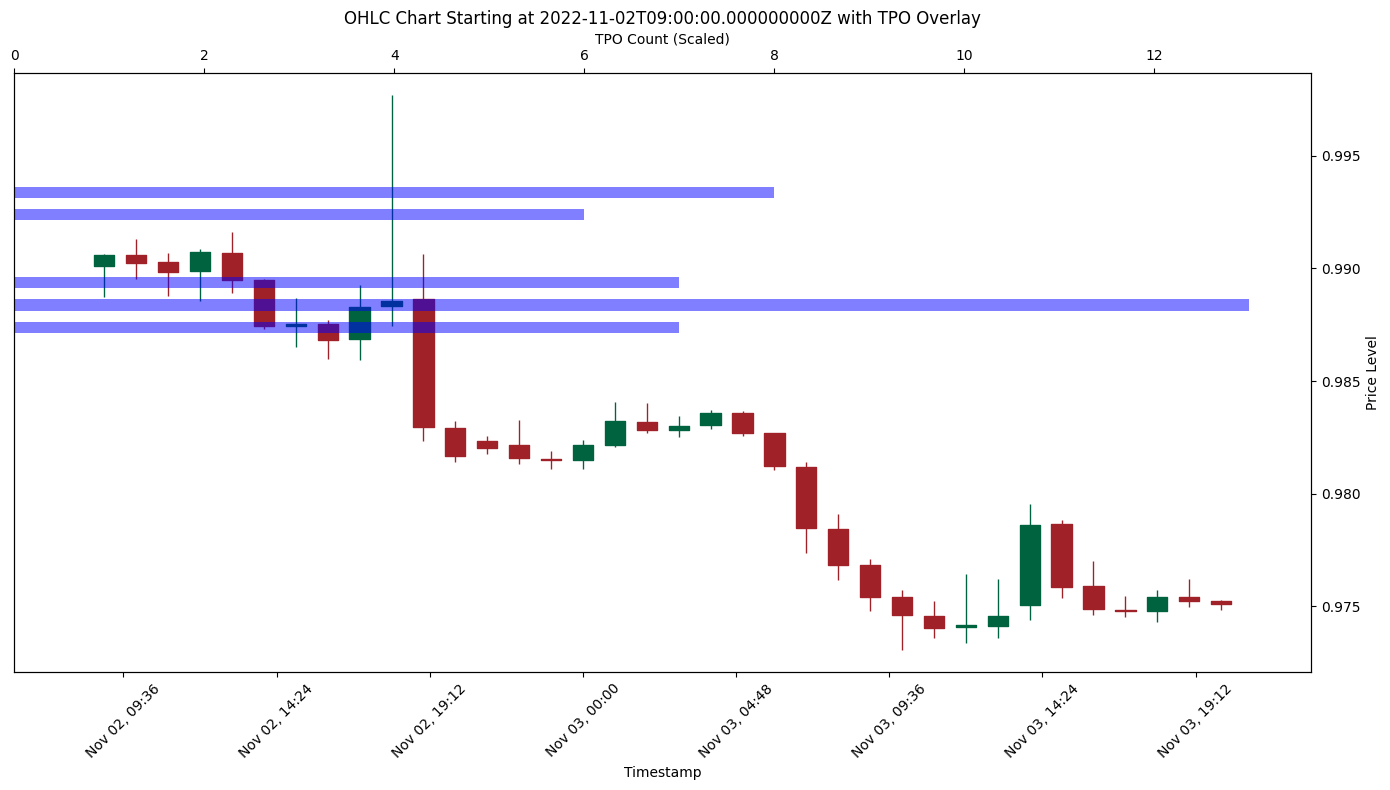

In [ ]:
def plot_ohlc_with_tpo_overlay(df_5m, tpo_df, start_timestamp, num_candles=30):
    """
    Plots OHLC data with TPO counts overlaid on the same price levels using a secondary x-axis.

    Parameters:
    - df_5m (pd.DataFrame): DataFrame containing 5-minute OHLC data with a DatetimeIndex.
    - tpo_df (pd.DataFrame): DataFrame containing TPO data with columns ['Window', 'Timestamp', 'Price', 'TPO'].
    - start_timestamp (str): The timestamp to plot TPO from and to start plotting OHLC.
    - num_candles (int): Number of candles to include in the OHLC plot after the adjusted start date.
    """
    # Ensure the index is sorted and is a DatetimeIndex
    df_5m = df_5m.sort_index()

    # Convert start_timestamp to a datetime object
    # start_timestamp = pd.to_datetime(start_timestamp)

    # Plot TPO data for the specified start_timestamp
    min_price, max_price = df_5m['Low'].min(), df_5m['High'].max()
    tpo_data = tpo_df[
        (tpo_df['Time'] == start_timestamp) &
        (tpo_df['Price'] >= min_price) &
        (tpo_df['Price'] <= max_price)
    ]
    print(tpo_data)
    tpo_data = tpo_data[tpo_data['TPO'] > 0]  # Only non-zero TPO counts

    # Calculate the OHLC plot start date
    ohlc_start_date = start_timestamp

    # Ensure the index is properly set
    df_5m.set_index('time', inplace=True)

    # Get the start index and calculate the end index for OHLC data
    start_idx = df_5m.index.get_loc(ohlc_start_date)
    end_idx = start_idx + num_candles

    # Handle case where end_idx exceeds DataFrame length
    if end_idx > len(df_5m):
        end_idx = len(df_5m)

    # Slice the OHLC data for the selected window
    ohlc_data = df_5m.iloc[start_idx:end_idx]

    # Extract the true price range from the OHLC data
    true_min_price = ohlc_data['Low'].min()
    true_max_price = ohlc_data['High'].max()

    # Create a figure and primary axis
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot the OHLC data with mplfinance on ax1
    mpf.plot(
        ohlc_data,
        type='candle',
        style='charles',
        ax=ax1,
        volume=False,
        show_nontrading=True
    )

    # Set title and labels for the OHLC plot
    ax1.set_title(f"OHLC Chart Starting at {start_timestamp} with TPO Overlay")
    ax1.set_xlabel("Timestamp")
    ax1.set_ylabel("Price Level")

    # Set the true y-axis range for the price
    ax1.set_ylim([true_min_price - true_min_price * 0.001, true_max_price + true_max_price * 0.001])  # Add a small buffer to the range

    # Create a secondary x-axis for TPO counts
    ax2 = ax1.twiny()

    # Calculate the maximum TPO value for normalization
    max_tpo = tpo_data['TPO'].max()

    # Plot the TPO data as horizontal bars on ax2
    for i, row in tpo_data.iterrows():
        ax2.barh(
            y=row['Price'],              # Vertical position based on Price
            width=row['TPO'],  # Normalize TPO to make bars thinner
            left=0,                      # Align bars to the left side of the chart
            height=0.0005,                  # Adjust bar thickness
            color='blue',
            alpha=0.5,
            align='center'
        )

    # Set labels for the TPO plot
    ax2.set_xlabel("TPO Count (Scaled)")

    # Synchronize the y-axis limits with the true price range
    ax2.set_ylim(ax1.get_ylim())

    # Position the secondary x-axis on the top
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()


# Call the function
plot_ohlc_with_tpo_overlay(x, tpo_df, '2022-11-02T09:00:00.000000000Z', num_candles=36)


In [ ]:
x[x['time']=='2022-11-02T09:00:00.000000000Z']


,time,Open,High,Low,Close,Volume
33,2022-11-02 09:00:00+00:00,0.99012,0.99064,0.98873,0.99058,4243


In [ ]:
tpo_df[tpo_df['Time']=='2022-11-02T09:00:00.000000000Z']

,Time,Price,TPO
15,2022-11-02T09:00:00.000000000Z,0.98837,13
16,2022-11-02T09:00:00.000000000Z,0.99337,8
17,2022-11-02T09:00:00.000000000Z,0.98737,7
18,2022-11-02T09:00:00.000000000Z,0.98937,7
19,2022-11-02T09:00:00.000000000Z,0.99237,6


In [ ]:
class StopLoss():
  def __init__():
    pass


In [ ]:
class TakeProfit():
  def __init()__:
    pass

In [ ]:
class MA():
  def __init__(self,
               MA_size=8,
               ATR_period=14):
    self.MA_size=MA_size
    self.ATR_period=ATR_period
    self.time_frame=time_frame

    column_names = ['start_time','end_time','enter_price','exit_price','method','time_frame','position_type','tp_price','sl_price','complete_status','profit']
    self.executed_orders= pd.DataFrame(columns=column_names)
    self.buy_order_list= pd.DataFrame(columns=column_names)
    self.sell_order_list=pd.DataFrame(columns=column_names)


  def data_loading(self,df):

    pass
  def ATR_calculation(self,df):
    df['High-Low'] = df['ask_h'] - df['ask_l']
    df['High-Close'] = abs(df['ask_h'] - df['ask_c'].shift(1))
    df['Low-Close'] = abs(df['ask_l'] - df['ask_c'].shift(1))
    df['TrueRange'] = df[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
    df['ATR'] = df['TrueRange'].rolling(window=self.ATR_period).mean()
    df = df.drop(['High-Low', 'High-Close', 'Low-Close', 'TrueRange'], axis=1)
    df.dropna(inplace=True)
    df = df.reset_index(drop=True)
    return df

  def data_exporting(self,df):
    df[f'ma{self.MA_size}'] = df.ask_c.rolling(window=self.MA_size).mean()
    df.dropna(inplace=True)
    df = df.reset_index(drop=True)
    df=self.ATR_calculation(df)
    self.data=df
    return df

  def ma_cross_price(self):
    self.method='ma cross price'
    for i in range(len(self.data)-1):
      if (self.data.iloc[i]['mid_h']<self.data.iloc[i]['ma50'])&(self.data.iloc[i+1]['mid_h']>self.data.iloc[i+1]['ma50']):
        tp_price=(self.data.iloc[i+1]['ask_c']) - 3 * (self.data.iloc[i+1]['ATR'])
        sl_price=(self.data.iloc[i+1]['ask_c']) + 3 * (self.data.iloc[i+1]['ATR'])
        order = {'start_time':self.data.iloc[i+1]['time'],'end_time':'','enter_price':self.data.iloc[i+1]['mid_h'],'exit_price':0,'method':self.method,'time_frame':self.time_frame,'position_type':'Buy','tp_price':tp_price,'sl_price':sl_price,'complete_status':'No','profit':0}

        self.buy_order_list = self.buy_order_list.append(order, ignore_index=True)

      elif (self.data.iloc[i]['ask_l']>self.data.iloc[i]['ma50'])&(self.data.iloc[i+1]['mid_l']<self.data.iloc[i+1]['ma50']):
        tp_price=(self.data.iloc[i+1]['mid_c']) + 3 * (self.data.iloc[i+1]['ATR'])
        sl_price=(self.data.iloc[i+1]['mid_c']) - 3 * (self.data.iloc[i+1]['ATR'])
        order = {'start_time':self.data.iloc[i+1]['time'],'end_time':'','enter_price':self.data.iloc[i+1]['mid_l'],'exit_price':0,'method':self.method,'time_frame':self.time_frame,'position_type':'Sell','tp_price':tp_price,'sl_price':sl_price,'complete_status':'No','profit':0}

        self.sell_order_list = self.sell_order_list.append(order, ignore_index=True)

      if ((self.buy_order_list['tp_price'] > self.data.iloc[i]['mid_l']).any()) | ((self.buy_order_list['sl_price'] < self.data.iloc[i]['mid_h']).any()):
        conditions = ((self.buy_order_list['tp_price'] > self.data.iloc[i]['mid_l'])| (self.buy_order_list['sl_price'] < self.data.iloc[i]['mid_h']))
        positions_indexes = self.buy_order_list.index[conditions].tolist()
        for index,_ in enumerate(positions_indexes):
          order={
              'start_time':self.buy_order_list.loc[index]['start_time'],
              'end_time':self.data.iloc[i]['time'],
              'enter_price':self.buy_order_list.loc[index]['enter_price'],
              'exit_price':self.data.iloc[i]['mid_c'],
              'method':self.buy_order_list.loc[index]['method'],
              'time_frame':self.buy_order_list.loc[index]['time_frame'],
              'position_type':self.buy_order_list.loc[index]['position_type'],
              'tp_price':self.buy_order_list.loc[index]['tp_price'],
              'sl_price':self.buy_order_list.loc[index]['sl_price'],
              'complete_status':'Yes',
              'profit':-(self.data.iloc[i]['mid_c'] - self.buy_order_list.loc[index]['enter_price'])
          }
          print(order)
          self.save_positions(order)
        self.buy_order_list = self.buy_order_list.drop(positions_indexes)
        self.buy_order_list = self.buy_order_list.reset_index(drop=True)

      if ((self.sell_order_list['tp_price']< self.data.iloc[i]['mid_h']).any())| ((self.sell_order_list['sl_price']>self.data.iloc[i]['mid_l']).any()):
        conditions = ((self.sell_order_list['tp_price'] < self.data.iloc[i]['mid_h'])| (self.sell_order_list['sl_price']>self.data.iloc[i]['mid_l']))
        positions_indexes = self.sell_order_list.index[conditions].tolist()
        for index,_ in enumerate(positions_indexes):
          order={
              'start_time':self.sell_order_list.loc[index]['start_time'],
              'end_time':self.data.iloc[i]['time'],
              'enter_price':self.sell_order_list.loc[index]['enter_price'],
              'exit_price':self.data.iloc[i]['mid_c'],
              'method':self.sell_order_list.loc[index]['method'],
              'time_frame':self.sell_order_list.loc[index]['time_frame'],
              'position_type':self.sell_order_list.loc[index]['position_type'],
              'tp_price':self.sell_order_list.loc[index]['tp_price'],
              'sl_price':self.sell_order_list.loc[index]['sl_price'],
              'complete_status':'Yes',
              'profit':(self.data.iloc[i]['mid_c'] - self.sell_order_list.iloc[index]['enter_price'])
          }
          print(order)
          self.save_positions(order)
        self.sell_order_list = self.sell_order_list.drop(positions_indexes)
        self.sell_order_list = self.sell_order_list.reset_index(drop=True)


  def save_positions(self,order):
    self.executed_orders = self.executed_orders.append(order, ignore_index=True)



In [ ]:
from args import args
import pandas as pd
import requests
class DataGeneration():
  def __init__(self,
               instrument_name:str='EUR_USD',
               time_frame:str='H1',
               count:int=100,
               start_time:str='',
               end_time:str='',
               price:str='MBA',
               ):
    self.instrument_name=instrument_name
    self.time_frame=time_frame
    self.count=count
    self.start_time=start_time
    self.end_time=end_time
    self.URL=f"{args.SERVICE_URL}/instruments/{instrument_name}/candles"
    self.session=requests.Session()
    self.price=price
    self.prices_list = []
    if 'M' in self.price:
        self.prices_list.append('mid')
    if 'B' in self.price:
        self.prices_list.append('bid')
    if 'A' in self.price:
        self.prices_list.append('ask')
    self.headers=args.SECURE_HEADER
    self.params=dict(
        count=self.count,
        granularity=self.time_frame,
        price=self.price
    )

  def get_data(self):
    self.response = self.session.get(self.URL,params=self.params,headers=self.headers)
    return self.response.status_code, self.response.json()
  def find_piplocation(self,instrument=None):
    if instrument==None:
      instument_name= self.instrument_name
    else:
      instrument_name=instrument

    url = f"{args.SERVICE_URL}/accounts/{args.ACCOUNT_ID}/instruments"
    response = self.session.get(url, params=None, headers=args.SECURE_HEADER)
    instruments = response.json()
    instrument_index = next((index for index, inst in enumerate(instruments['instruments']) if inst['name'] == instument_name), None)
    self.piplocation=instruments['instruments'][instrument_index]['pipLocation']

  def get_instruments_df(self):
        code, data = self.get_data()
        if code == 200:
          our_data = []
          ohlc = ['o', 'h', 'l', 'c']
          for candle in data['candles']:
              if candle['complete'] == False:
                  continue
              new_dict = {}
              new_dict['time'] = candle['time']
              new_dict['volume'] = candle['volume']
              for price in self.prices_list:
                  for oh in ohlc:
                      new_dict[f"{price}_{oh}"] = candle[price][oh]
              our_data.append(new_dict)
        our_data= pd.DataFrame.from_dict(our_data)
        our_data.loc[:, our_data.columns != 'time'] = our_data.loc[:, our_data.columns != 'time'].astype(float)
        return our_data,self.time_frame


In [ ]:
import argparse
args = argparse.Namespace()

def parse_arguments():
  args.API_KEY='6447ed02cdf7bfbd73db34bf287caefc-5bca220e0b35c796a5f5a4ea50519a4b'
  args.ACCOUNT_ID='101-004-27509106-001'
  args.SERVICE_URL='https://api-fxpractice.oanda.com/v3'
  args.SECURE_HEADER={'Authorization':f'Bearer {args.API_KEY}'}
  return args

def run_args():
  args=parse_arguments()


run_args()

In [ ]:
instruments="EUR_USD"
count=10
granularity="H1"
params=dict(
    count=count,
    granularity=granularity,
    price="MBA"
)

In [ ]:
url=f"{args.SERVICE_URL}/instruments/{instruments}/candles"
url
session=requests.Session()

In [ ]:
response=session.get(url,params=params,headers=args.SECURE_HEADER)
response.json()

{'instrument': 'EUR_USD',
 'granularity': 'H1',
 'candles': [{'complete': True,
   'volume': 4470,
   'time': '2023-12-01T12:00:00.000000000Z',
   'bid': {'o': '1.08968', 'h': '1.09005', 'l': '1.08749', 'c': '1.08761'},
   'mid': {'o': '1.08975', 'h': '1.09012', 'l': '1.08756', 'c': '1.08768'},
   'ask': {'o': '1.08982', 'h': '1.09020', 'l': '1.08764', 'c': '1.08776'}},
  {'complete': True,
   'volume': 7094,
   'time': '2023-12-01T13:00:00.000000000Z',
   'bid': {'o': '1.08761', 'h': '1.08840', 'l': '1.08657', 'c': '1.08668'},
   'mid': {'o': '1.08768', 'h': '1.08847', 'l': '1.08664', 'c': '1.08676'},
   'ask': {'o': '1.08775', 'h': '1.08855', 'l': '1.08672', 'c': '1.08684'}},
  {'complete': True,
   'volume': 7017,
   'time': '2023-12-01T14:00:00.000000000Z',
   'bid': {'o': '1.08668', 'h': '1.08698', 'l': '1.08407', 'c': '1.08435'},
   'mid': {'o': '1.08676', 'h': '1.08705', 'l': '1.08414', 'c': '1.08445'},
   'ask': {'o': '1.08683', 'h': '1.08712', 'l': '1.08421', 'c': '1.08455'}},

In [ ]:
response

<Response [200]>

In [ ]:
pip install telegram

  Preparing metadata (setup.py) ... done
  Created wheel for telegram: filename=telegram-0.0.1-py3-none-any.whl size=1293 sha256=f2afdca69820a017fb3ea658edd390ebb17e0318814f804eeab63af20d770d98
  Stored in directory: /root/.cache/pip/wheels/f3/f2/16/dc6d6c6c7e0422206fec62833039a2b4082de3b85e55d32b52
Successfully built telegram


In [ ]:
pip install python-binance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.0 MB/s eta 0:00:00


In [ ]:
pip install binance-connector


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.0 MB/s eta 0:00:00


In [ ]:
pip install binance-futures-connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.2 MB/s eta 0:00:00


In [ ]:
!python3 -m pip install python-binance

In [ ]:
import json

In [ ]:
!python3 --version

Python 3.10.12


In [ ]:
!sudo apt-get install python3.5
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.5 1


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libpython3.5-stdlib' for regex 'python3.5'
Note, selecting 'libpython3.5-minimal' for regex 'python3.5'
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
update-alternatives: error: alternative path /usr/bin/python3.5 doesn't exist


In [ ]:
!sudo update-alternatives --config python3

update-alternatives: error: no alternatives for python3


In [ ]:
!python -m pip install MetaTrader5

ERROR: Could not find a version that satisfies the requirement MetaTrader5 (from versions: none)
ERROR: No matching distribution found for MetaTrader5


In [ ]:
URL='https://api.binance.us/api/v3/uiKlines?symbol=EURUSDT&interval=1m&limit=100'
response=requests.get(URL)
response

NameError: name 'requests' is not defined

In [ ]:
response.text

'{"code":-1121,"msg":"Invalid symbol."}'

In [ ]:
print((json.loads(response.text)))

2
